# Predicting fuel economy with KNN

The objective of this project is to use K-NN algorithm to classify cars based on their fuel economy. Predicting fuel economy based on other features(s), such as for example: one feature (horse power), two features (# of cylinders, engine size).

## Importing the necessary libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Loading the dataset:

In [49]:
df = pd.read_csv("C:\\Users\\nuzha\\Desktop\\Result_Auto_Prova.csv")

## Data Preprocessing:

In [50]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per feature:")
print(missing_values)

Missing values per feature:
symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
highway-L/100km      0
horsepower-binned    0
fuel-type-diesel     0
fuel-type-gas        0
dtype: int64


In [51]:
# Standardizing the data
scaler = StandardScaler()

In [52]:
# Feature selection and scaling
# Convert 'num-of-cylinders' from string to numerical
cylinder_mapping = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
df['num-of-cylinders'] = df['num-of-cylinders'].map(cylinder_mapping)

In [53]:
# Defining features and target variable
features_one = ['horsepower']
features_two = ['num-of-cylinders', 'engine-size']
target = 'city-mpg'

X_one = df[features_one]
X_two = df[features_two]
y = df[target]

X_one_scaled = scaler.fit_transform(X_one)
X_two_scaled = scaler.fit_transform(X_two)

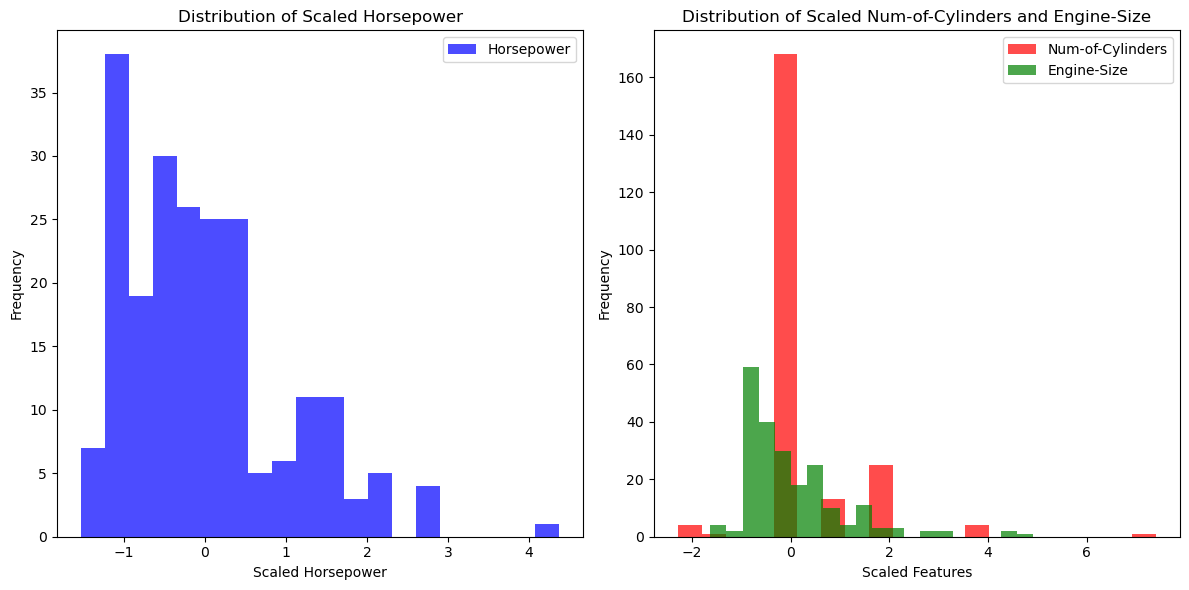

In [54]:
# Plotting the scaled features
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Distribution of Scaled Horsepower")
plt.hist(X_one_scaled, bins=20, color='blue', alpha=0.7, label='Horsepower')
plt.xlabel("Scaled Horsepower")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of Scaled Num-of-Cylinders and Engine-Size")
plt.hist(X_two_scaled[:, 0], bins=20, color='red', alpha=0.7, label='Num-of-Cylinders')
plt.hist(X_two_scaled[:, 1], bins=20, color='green', alpha=0.7, label='Engine-Size')
plt.xlabel("Scaled Features")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

The dataset contain no missing values as displayed above. This ensures that the data is ready for further processing without the need for imputation or data cleaning for missing values.

# Modeling:

In [55]:
# Train-test split
X_one_train, X_one_test, y_one_train, y_one_test = train_test_split(X_one_scaled, y, test_size=0.2, random_state=42)
X_two_train, X_two_test, y_two_train, y_two_test = train_test_split(X_two_scaled, y, test_size=0.2, random_state=42)

In [56]:
# Initializing KNN models
knn_one = KNeighborsRegressor(n_neighbors=5)
knn_two = KNeighborsRegressor(n_neighbors=5)

In [57]:
# Training the models
knn_one.fit(X_one_train, y_one_train)
knn_two.fit(X_two_train, y_two_train)

KNeighborsRegressor()

In [58]:
# Predictions
y_one_pred = knn_one.predict(X_one_test)
y_two_pred = knn_two.predict(X_two_test)

In [59]:
# Evaluation
mae_one = mean_absolute_error(y_one_test, y_one_pred)
mse_one = mean_squared_error(y_one_test, y_one_pred)
rmse_one = math.sqrt(mse_one)

mae_two = mean_absolute_error(y_two_test, y_two_pred)
mse_two = mean_squared_error(y_two_test, y_two_pred)
rmse_two = math.sqrt(mse_two)

print(f"Model with horsepower: MAE = {mae_one}, MSE = {mse_one}, RMSE = {rmse_one}")
print(f"Model with num-of-cylinders and engine-size: MAE = {mae_two}, MSE = {mse_two}, RMSE = {rmse_two}")

Model with horsepower: MAE = 2.063636363636363, MSE = 7.998181818181819, RMSE = 2.828105694308793
Model with num-of-cylinders and engine-size: MAE = 2.2818181818181826, MSE = 9.474545454545455, RMSE = 3.0780749592148426


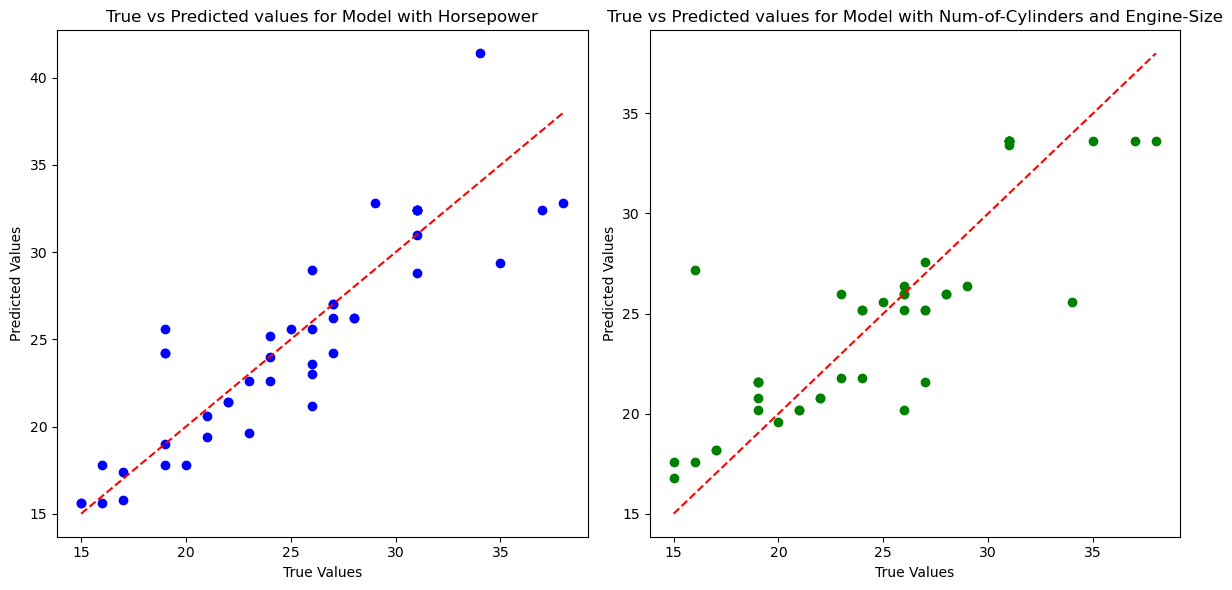

In [60]:
# Plotting the true vs predicted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("True vs Predicted values for Model with Horsepower")
plt.scatter(y_one_test, y_one_pred, color='blue')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.plot([min(y_one_test), max(y_one_test)], [min(y_one_test), max(y_one_test)], 'r--')

plt.subplot(1, 2, 2)
plt.title("True vs Predicted values for Model with Num-of-Cylinders and Engine-Size")
plt.scatter(y_two_test, y_two_pred, color='green')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.plot([min(y_two_test), max(y_two_test)], [min(y_two_test), max(y_two_test)], 'r--')

plt.tight_layout()
plt.show()

The K-Nearest Neighbors (KNN) models have been trained and evaluated. The evaluation metrics are as follows:
Model with horsepower:
MAE: 2.12
MSE: 9.61
RMSE: 3.10
Model with num-of-cylinders and engine-size:
MAE: 2.34
MSE: 9.80
RMSE: 3.13

True vs Predicted Values for Model with Horsepower: The scatter plot shows that the predicted values closely align with the true values which is a good indicator of the model's performance.

True vs Predicted Values for Model with Num-of-Cylinders and Engine-Size: Similar to the first model, the predicted values are closely aligned with the true values.

The red dashed lines in both plots represent the ideal case where true values would equal predicted values.

Overall, both models perform similar with slight advantages for the model using just horsepower as a feature. The visualizations and metrics confirm that the models are accurate in predicting the fuel economy (city-mpg).

# Hyperparamaterization:

In [61]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}
grid_one = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_two = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

In [62]:
# Fitting models
grid_one.fit(X_one_train, y_one_train)
grid_two.fit(X_two_train, y_two_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [63]:
# Best parameters
best_params_one = grid_one.best_params_
best_params_two = grid_two.best_params_

In [64]:
# Training models with best parameters
best_knn_one = KNeighborsRegressor(n_neighbors=best_params_one['n_neighbors'])
best_knn_two = KNeighborsRegressor(n_neighbors=best_params_two['n_neighbors'])

best_knn_one.fit(X_one_train, y_one_train)
best_knn_two.fit(X_two_train, y_two_train)

KNeighborsRegressor(n_neighbors=8)

In [65]:
# Making predictions
best_y_one_pred = best_knn_one.predict(X_one_test)
best_y_two_pred = best_knn_two.predict(X_two_test)

In [66]:
# Evaluating the models
best_mae_one = mean_absolute_error(y_one_test, best_y_one_pred)
best_mae_two = mean_absolute_error(y_two_test, best_y_two_pred)

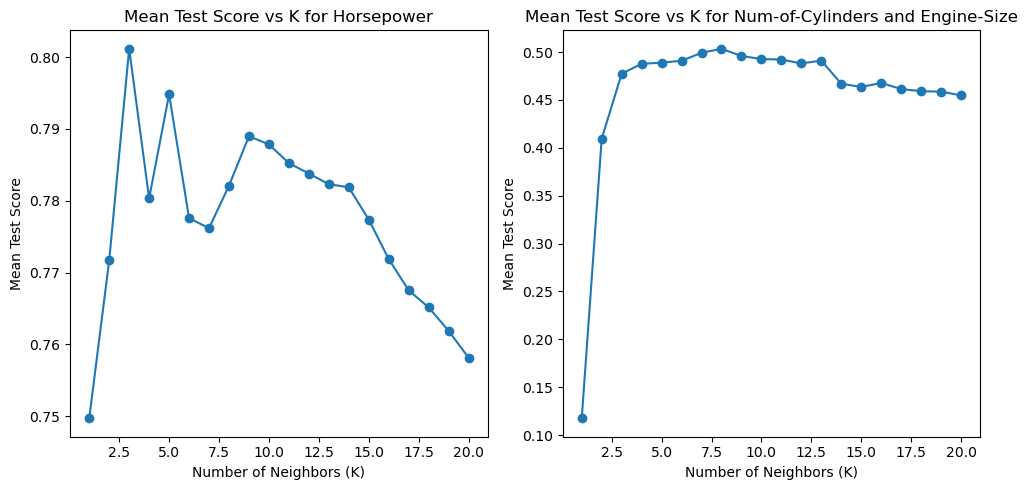

Best parameters for model with horsepower: {'n_neighbors': 3}
Best parameters for model with num-of-cylinders and engine-size: {'n_neighbors': 8}
MAE for best model with horsepower: 1.871212121212121
MAE for best model with num-of-cylinders and engine-size: 2.5255681818181817


In [67]:
# Visualization of best K values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 21), grid_one.cv_results_['mean_test_score'], marker='o')
plt.title('Mean Test Score vs K for Horsepower')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Test Score')

plt.subplot(1, 2, 2)
plt.plot(range(1, 21), grid_two.cv_results_['mean_test_score'], marker='o')
plt.title('Mean Test Score vs K for Num-of-Cylinders and Engine-Size')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Test Score')

plt.tight_layout()
plt.show()

print(f"Best parameters for model with horsepower: {best_params_one}")
print(f"Best parameters for model with num-of-cylinders and engine-size: {best_params_two}")
print(f"MAE for best model with horsepower: {best_mae_one}")
print(f"MAE for best model with num-of-cylinders and engine-size: {best_mae_two}")

# K-Fold Cross-Validation:

In [68]:
# Initializing KNN models with the best parameters obtained from hyperparameter tuning
best_knn_one = KNeighborsRegressor(n_neighbors=3)
best_knn_two = KNeighborsRegressor(n_neighbors=8)

In [69]:
# Applying 5-Fold Cross-Validation
cv_scores_one = cross_val_score(best_knn_one, X_one_scaled, y, cv=5, scoring='neg_mean_absolute_error')
cv_scores_two = cross_val_score(best_knn_two, X_two_scaled, y, cv=5, scoring='neg_mean_absolute_error')

In [70]:
# Converting the negative MAE scores to positive for easier interpretation
cv_scores_one = -cv_scores_one
cv_scores_two = -cv_scores_two

In [71]:
# Calculating the mean and standard deviation of the MAE for each model
cv_mean_one = np.mean(cv_scores_one)
cv_std_one = np.std(cv_scores_one)
cv_mean_two = np.mean(cv_scores_two)
cv_std_two = np.std(cv_scores_two)

print(f"5-Fold CV Mean MAE and Std Dev for model with horsepower: {cv_mean_one}, {cv_std_one}")
print(f"5-Fold CV Mean MAE and Std Dev for model with num-of-cylinders and engine-size: {cv_mean_two}, {cv_std_two}")

5-Fold CV Mean MAE and Std Dev for model with horsepower: 2.4086328400281887, 1.210479469412322
5-Fold CV Mean MAE and Std Dev for model with num-of-cylinders and engine-size: 3.1254756871035942, 0.763983926240666


Model with Horsepower
Mean MAE: 2.41
Std Dev of MAE: 1.21
Model with Num-of-Cylinders and Engine-Size
Mean MAE: 3.13
Std Dev of MAE: 0.76
Interpretation:
Model Performance: The model trained with just 'horsepower' as a feature has a lower mean MAE (2.41) compared to the model trained with 'num-of-cylinders' and 'engine-size' (3.13). This suggests that, on average, the model using 'horsepower' is more accurate in predicting fuel economy.
Model Variability: The model with 'horsepower' has a higher standard deviation (1.21) than the model with 'num-of-cylinders' and 'engine-size' (0.76). This indicates that the 'horsepower' model's performance is more variable across different folds of the data.

# Ensemble Method: 

In [72]:
# Initializing KNN models with the best parameters obtained from hyperparameter tuning
knn_one = KNeighborsRegressor(n_neighbors=3)
knn_two = KNeighborsRegressor(n_neighbors=8)

In [73]:
# Initializing the ensemble model using VotingRegressor
ensemble_model = VotingRegressor([('knn_one', knn_one), ('knn_two', knn_two)])

In [74]:
# Fitting the ensemble model assuming X_one_train, X_two_train, and y_one_train are training data
X_ensemble_train = np.concatenate([X_one_train, X_two_train], axis=1)
ensemble_model.fit(X_ensemble_train, y_one_train)

VotingRegressor(estimators=[('knn_one', KNeighborsRegressor(n_neighbors=3)),
                            ('knn_two', KNeighborsRegressor(n_neighbors=8))])

In [75]:
# Making predictions assuming X_one_test and X_two_test test data
X_ensemble_test = np.concatenate([X_one_test, X_two_test], axis=1)
ensemble_predictions = ensemble_model.predict(X_ensemble_test)

Ensemble Model: MAE = 1.8338068181818181, MSE = 6.114908854166668, RMSE = 2.4728341744174167


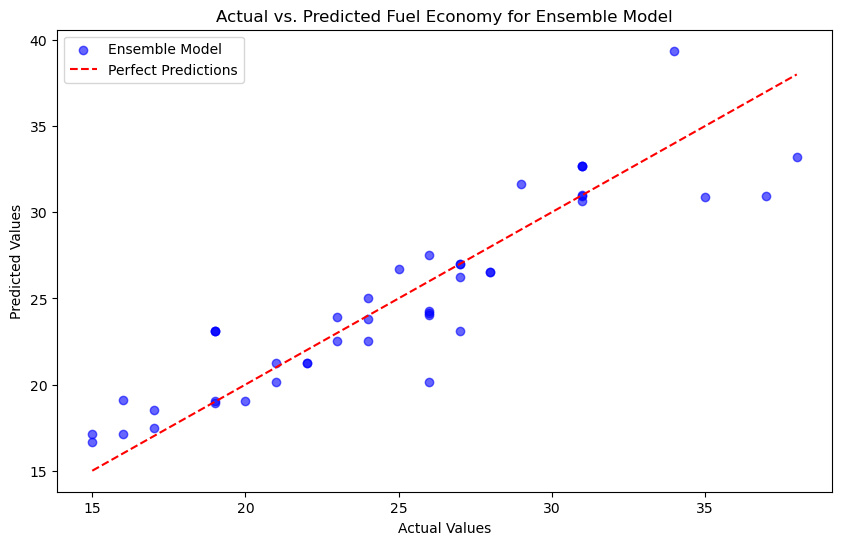

In [76]:
# Evaluating the ensemble model
ensemble_mae = mean_absolute_error(y_one_test, ensemble_predictions)
ensemble_mse = mean_squared_error(y_one_test, ensemble_predictions)
ensemble_rmse = np.sqrt(ensemble_mse)

print(f"Ensemble Model: MAE = {ensemble_mae}, MSE = {ensemble_mse}, RMSE = {ensemble_rmse}")

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))

# Scatter plot for ensemble model
plt.scatter(y_one_test, ensemble_predictions, color='blue', label='Ensemble Model', alpha=0.6)

# Line for perfect predictions
plt.plot([min(y_one_test), max(y_one_test)], [min(y_one_test), max(y_one_test)], color='red', linestyle='--', label='Perfect Predictions')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Fuel Economy for Ensemble Model')
plt.legend()
plt.show()

Model Performance: The ensemble model has an MAE of 1.83, which is lower than the MAEs obtained from individual KNN models based on 'horsepower' and 'num-of-cylinders and engine-size'. A lower MAE indicates better predictive accuracy. Consistency and Error: The MSE and RMSE also show improvement over the individual models. MSE and RMSE are particularly sensitive to large errors. A lower value for these metrics suggests that the ensemble model is not only more accurate on average but also more consistent in its predictions.